In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ekarus.e2e.utils.deformable_mirror_utilities as dmutils

from ekarus.e2e.alpao_deformable_mirror import ALPAODM

In [2]:
# Option A: define a DM from the number of actuators

DM468 = ALPAODM(468) # defined from configuration, simulating the IFFs with tps module

# This may take a little while, especially for > 200 acts

In [3]:
# Option B: define a DM from real data

# IMPORTANT: make sure you have downloaded the correct data
# from the wiki and uploaded it into ekarus/ekarus/e2e/alpao_dms/
# you can download the data from the wiki:
# http://aowiki.arcetri.inaf.it/pub/ADOPT/AlpaoDm820/20250217_160029.zip?_t=1749657304

tn = '20250217_160029' # Make sure you have downloaded
DM820 = ALPAODM(tn) # defined from data measurements

np.float64(1.0412570153671917e-07)

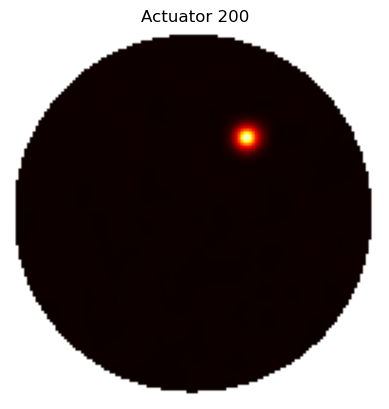

In [4]:
# Show IFFs
act_id = 200
DM820.plot_surface(surf2plot=DM820.IFF[:,act_id],title = f'Actuator {act_id}')

np.float64(3.737655683176837e-08)

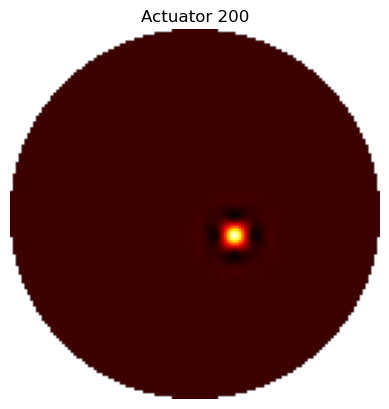

In [5]:
# Show IFFs
act_id = 200
DM468.plot_surface(surf2plot=DM468.IFF[:,act_id],title = f'Actuator {act_id}')

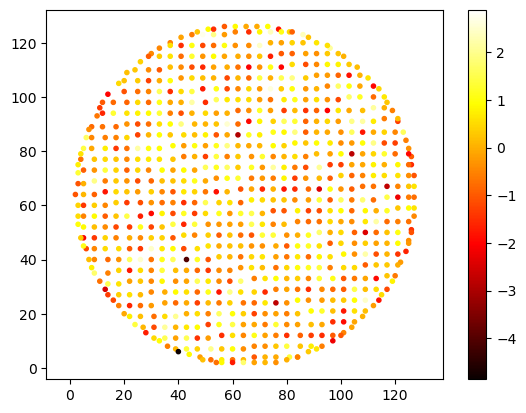

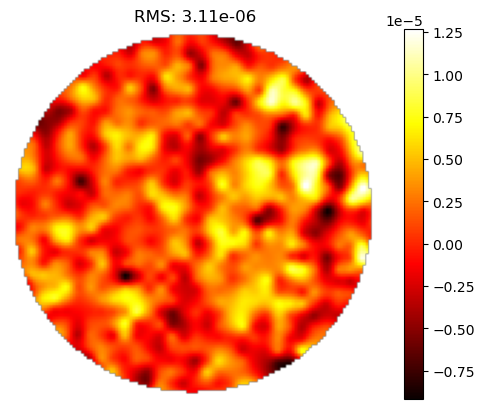

In [6]:
# Apply a random command
new_cmd = np.random.randn(DM820.Nacts)
DM820.set_position(new_cmd)
plt.figure(), DM820.plot_position()
plt.figure(), DM820.plot_surface()
plt.colorbar()

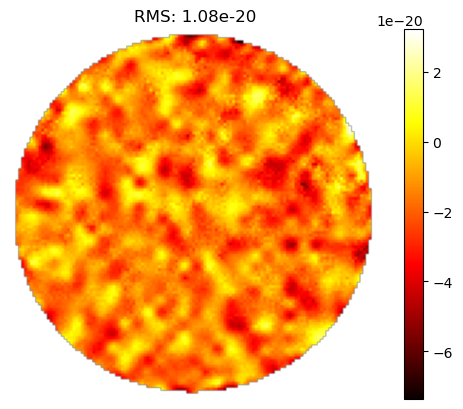

In [7]:
# Apply flat
start_surface = DM820.surface
flat_cmd = DM820.R @ start_surface
DM820.set_position(-flat_cmd)

DM820.plot_surface()
plt.colorbar()

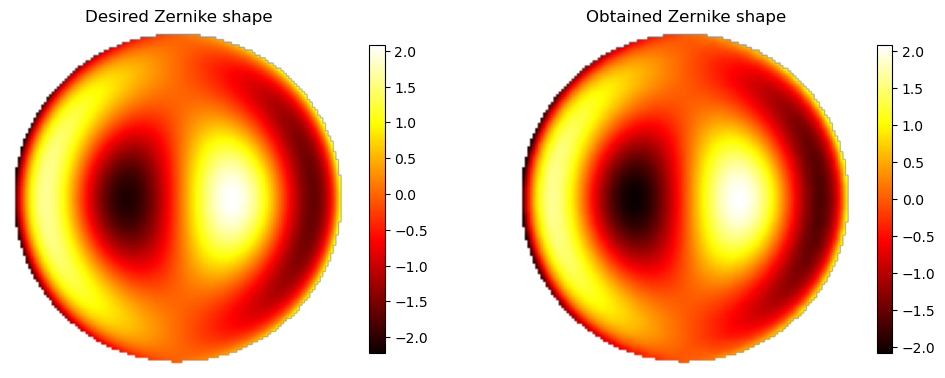

In [8]:
# Apply a Zernike mode
from arte.types.mask import CircularMask
from ekarus.e2e.utils.create_field_from_zernike_coefficients import create_field_from_zernike_coefficients

mask = CircularMask(np.shape(DM820.mask), maskRadius=np.min(np.shape(DM820.mask))//2)

noll = 16
zern_amp = 1
input_field = create_field_from_zernike_coefficients(mask, noll, zern_amp)

zern = np.angle(input_field)

intersection_mask = np.logical_or(mask.mask(), DM820.mask)
zern_shape = zern.data[~intersection_mask]

zern_cmd = DM820.R @ zern_shape
DM820.set_position(zern_cmd, absolute = True)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
DM820.plot_surface(surf2plot = zern_shape, plt_mask = mask.mask(), title='Desired Zernike shape')
plt.colorbar(shrink=0.5)

plt.subplot(1,2,2)
DM820.plot_surface(title='Obtained Zernike shape')
plt.colorbar(shrink=0.5)